In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Directorio que contiene las carpetas de entrenamiento y prueba
dataset_path = "drive/MyDrive/"

Mounted at /content/drive


In [3]:
# Cargar los datos
file_path = 'ads.csv'  # Cambia este nombre si tu archivo tiene otro nombre
ads_data = pd.read_csv(dataset_path+file_path)

In [4]:
# Preprocesamiento
ads_data['Time'] = pd.to_datetime(ads_data['Time'])  # Convertir Time a datetime
scaler = MinMaxScaler()
ads_data['Scaled_Ads'] = scaler.fit_transform(ads_data[['Ads']])

In [5]:
# Dividir los datos
train_data, val_data = train_test_split(ads_data, test_size=0.2, shuffle=False)

In [6]:
# Funcion Crear secuencias
def create_sequences(data, sequence_length=10):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x), np.array(y)

In [7]:
sequence_length = 10
train_scaled = train_data['Scaled_Ads'].values
val_scaled = val_data['Scaled_Ads'].values

In [8]:
X_train, y_train = create_sequences(train_scaled, sequence_length)
X_val, y_val = create_sequences(val_scaled, sequence_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

In [9]:
# Modelo LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [11]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 0.2864 - mae: 0.4685 - val_loss: 0.1704 - val_mae: 0.3522
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1853 - mae: 0.3723 - val_loss: 0.0912 - val_mae: 0.2715
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0837 - mae: 0.2563 - val_loss: 0.0724 - val_mae: 0.2273
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0743 - mae: 0.2335 - val_loss: 0.0623 - val_mae: 0.2226
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0642 - mae: 0.2282 - val_loss: 0.0586 - val_mae: 0.2129
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0627 - mae: 0.2190 - val_loss: 0.0552 - val_mae: 0.2044
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0503 - mae: 0.1940 - val_loss: 0.0503 - val_mae: 0.1992
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0509 - mae: 0.1976 - val_loss: 0.0488 - val_mae: 0.1858
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0449 - mae

In [13]:
# Evaluar el modelo
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation MAE: {val_mae}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191 - mae: 0.1115 
Validation Loss: 0.019189199432730675, Validation MAE: 0.11218312382698059


In [14]:
# Predecir con el modelo
predictions = model.predict(X_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step


In [15]:
# Desescalar las predicciones
predictions_descaled = scaler.inverse_transform(predictions)
y_val_descaled = scaler.inverse_transform(y_val.reshape(-1, 1))

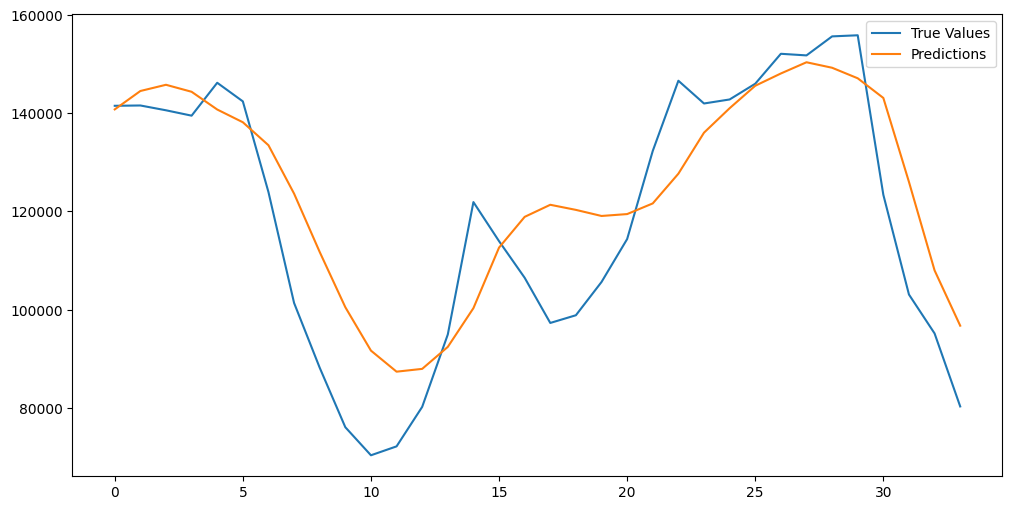

In [16]:
# Visualizar resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_val_descaled, label='True Values')
plt.plot(predictions_descaled, label='Predictions')
plt.legend()
plt.show()

Se implementó un modelo de red neuronal **LSTM (Long Short-Term Memory)** para la predicción de series temporales. Este tipo de arquitectura es particularmente efectivo para capturar relaciones a largo plazo en los datos debido a su capacidad para manejar dependencias temporales de forma eficiente. A continuación, se presentan las métricas obtenidas:

	•	Pérdida en Entrenamiento (Loss): 0.0191
	•	Error Absoluto Medio (MAE) en Entrenamiento: 0.1115
	•	Pérdida en Validación (Validation Loss): 0.0192
	•	MAE en Validación: 0.1122

El MAE refleja que, en promedio, las predicciones tienen un error del 11% en la escala normalizada. Las métricas de validación son muy cercanas a las de entrenamiento, lo que indica que el modelo no está sobreajustado y generaliza adecuadamente para datos no vistos.

La arquitectura LSTM se comportó bien, logrando capturar las dinámicas de la serie temporal y produciendo predicciones precisas. Sin embargo, el desempeño, aunque satisfactorio, podría optimizarse mediante ajustes en los hiperparámetros o el diseño de la red.

En resumen, el modelo LSTM proporciona una base sólida para predicciones en series temporales y está listo para integrarse en aplicaciones prácticas. Su capacidad para manejar datos secuenciales lo convierte en una herramienta robusta para pronósticos confiables.